In [2]:
%pip install sympy numpy matplotlib
# Importamos `sympy` para que nos ayude a realizar todas las operaciones 
# algebraicas
import sympy, numpy, matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 9.5 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 12.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 9.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 10.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 8.2 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2.3) a) Escriba La formula de interpolaciôn de Lagrange ajustada a los puntos \
$i = 2, 3,$ y $4$ dados en La siguiente tabla:

\begin{vmatrix*}
    i & x_i  & f(x_i) \\
    \hdashline
    1 & 0    & 0.9126 \\
    2 & 0.25 & 0.8109 \\
    3 & 0.5  & 0.6931 \\
    4 & 0.75 & 0.5596 \\
    5 & 1.0  & 0.4055
\end{vmatrix*}

b) Si La tercera derivada de La funciOn en $i = 3$ es $f" = - 0.26$, estime el \
error de La interpolaciOn de Lagrange obtenido en el inciso a) en $x = 0.6$.




a) Escriba La formula de interpolaciôn de Lagrange ajustada a los puntos \
$i = 2, 3,$ y $4$ dados en la tabla.

In [12]:
x, x2, x3, x4, f2, f3, f4 = sympy.symbols('x 0.25 0.5 0.75 0.8109 0.6931 0.5596')

f = (((x - x3) * (x - x4))/((x2 - x3) * (x2 - x4)) * (f2)) + \
    (((x - x2) * (x - x4))/((x3 - x2) * (x3 - x4)) * (f3)) + \
        (((x - x2) * (x - x3))/((x4 - x2) * (x4 - x3)) * (f4))
sympy.Eq(sympy.symbols('g(x)'), f)

Eq(g(x), 0.5596*(-0.25 + x)*(-0.5 + x)/((-0.25 + 0.75)*(-0.5 + 0.75)) + 0.6931*(-0.25 + x)*(-0.75 + x)/((-0.25 + 0.5)*(0.5 - 0.75)) + 0.8109*(-0.5 + x)*(-0.75 + x)/((0.25 - 0.5)*(0.25 - 0.75)))

Dejando que sympy resuelva la ecuación, nos queda:

In [11]:
x = sympy.symbols('x')

f = ((x - 0.5) * (x - 0.75))/((0.25 - 0.5) * (0.25 - 0.75)) * (0.8109) + \
    ((x - 0.25) * (x - 0.75))/((0.5 - 0.25) * (0.5 - 0.75)) * (0.6931) + \
        ((x - 0.25) * (x - 0.5))/((0.75 - 0.25) * (0.75 - 0.5)) * (0.5596)
sympy.Eq(sympy.symbols('g(x)'), f)

Eq(g(x), 6.4872*(x - 0.75)*(x - 0.5) - 11.0896*(x - 0.75)*(x - 0.25) + 4.4768*(x - 0.5)*(x - 0.25))

b) Si La tercera derivada de La función en $i = 3$ es $f''' = - 0.26$, estime el \
error de la interpolación de Lagrange obtenido en el inciso a) en $x = 0.6$.


In [18]:
e = ((x - x2) * (x - x3) * (x - x4)) / (sympy.symbols('3!')) * (sympy.symbols("f'''(3)"))
sympy.Eq(sympy.symbols('e(x)'), e)

Eq(e(x), f'''(3)*(-0.25 + x)*(-0.5 + x)*(-0.75 + x)/3!)

In [19]:
e = ((x - 0.25) * (x - 0.5) * (x - 0.75)) / (sympy.factorial(3)) * (-0.26)
sympy.Eq(sympy.symbols('e(x)'), e)

Eq(e(x), -0.0433333333333333*(x - 0.75)*(x - 0.5)*(x - 0.25))

Reemplazando $x = 0.6$ resulta en:

In [22]:
sympy.Eq(sympy.symbols('e(x)'), e).subs(x, 0.6)

Eq(e(x), 0.0002275)

Dejando que sympy resuelva la ecuación

2.11) Si se ajusta un polinomio de interpolaciOn de Lagrange a cuatro datos \
en x = 1, 2, 3 y 4, aparecen los siguientes polinomios ciibicos en Ia formula \
de interpolación:

a) $\frac{(x-2)(x-3)(x-4)}{(1-2)(1-3)(1-4)}$

b) $\frac{(x-1)(x-3)(x-4)}{(2-1)(2-3)(2-4)}$

c) $\frac{(x-1)(x-2)(x-4)}{(3-1)(3-2)(3-4)}$

d) $\frac{(x-1)(x-2)(x-3)}{(4-1)(4-2)(4-3)}$

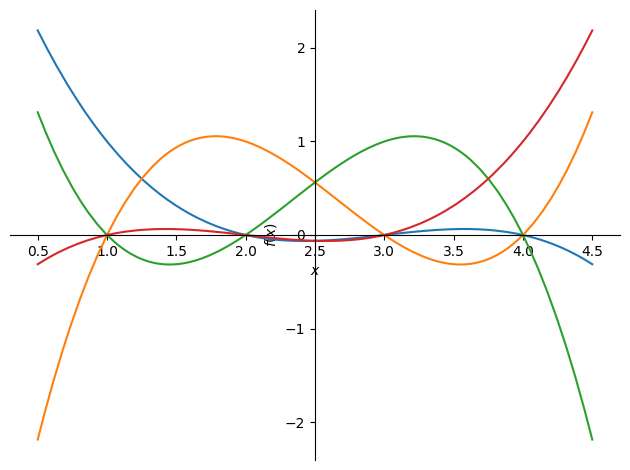

In [23]:
x = sympy.symbols('x')
f1 = ((x - 2) * (x - 3) * (x - 4))/((1 - 2) * (1 - 3) * (1 - 4))
f2 = ((x - 1) * (x - 3) * (x - 4))/((2 - 3) * (2 - 1) * (2 - 4))
f3 = ((x - 1) * (x - 2) * (x - 4))/((3 - 1) * (3 - 2) * (3 - 4))
f4 = ((x - 1) * (x - 2) * (x - 3))/((4 - 1) * (4 - 2) * (4 - 3))

sympy.plot(f1, f2, f3, f4, (x, 0.5, 4.5))

2.16) Deduzca el polinomio de interpolaciOn de Newton hacia adelante que pasa \
por los puntos $i = 2, 3, 4$ dados en Ia siguiente tabla:

\begin{vmatrix*}
    i & x_i  & f(x_i) \\
    \hdashline
    1 & 0    & 0.9126 \\
    2 & 0.25 & 0.8109 \\
    3 & 0.5  & 0.6931 \\
    4 & 0.75 & 0.5596 \\
    5 & 1.0  & 0.4055
\end{vmatrix*}
